In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
import os
import time

In [4]:
!pip install mdtraj

In [5]:
data_prefix='/content/drive/MyDrive/AF2_dynamics/calculated_data/'
sys_names=['3ttp', '2pc0', '1q9p', '1ebw','4z4x','6p9a']

In [6]:
import mdtraj as md

data_prefix='/content/drive/MyDrive/AF2_dynamics/calculated_data/'
sys_names=['3ttp', '2pc0', '1q9p', '1ebw','4z4x','6p9a']

with open(f'{data_prefix}HA_tcf_calc_eric.pkl','rb') as f:
    tmp0=pickle.load(f)

In [ ]:
with open(f'{data_prefix}HA_tcf_calc_raw_allmethods.pkl','rb') as f:
    tmp1=pickle.load(f)

In [ ]:
HA_tcf_calc = tmp0 | tmp1
del tmp0, tmp1

In [ ]:
for meth in ['AFc', 'BioEMU', 'DiG', 'MD','AF2']:
  print(meth)
  del HA_tcf_calc['3ttp'][meth]['scaled']
  del HA_tcf_calc['3ttp'][meth]['non_scaled']

  del HA_tcf_calc['2pc0'][meth]['scaled']
  del HA_tcf_calc['2pc0'][meth]['non_scaled']

  del HA_tcf_calc['1q9p'][meth]['scaled']
  del HA_tcf_calc['1q9p'][meth]['non_scaled']

  del HA_tcf_calc['1ebw'][meth]['scaled']
  del HA_tcf_calc['1ebw'][meth]['non_scaled']

  del HA_tcf_calc['4z4x'][meth]['scaled']
  del HA_tcf_calc['4z4x'][meth]['non_scaled']

  del HA_tcf_calc['6p9a'][meth]['scaled']
  del HA_tcf_calc['6p9a'][meth]['non_scaled']

In [ ]:
del HA_tcf_calc['3ttp']['test']
del HA_tcf_calc['2pc0']['test']
del HA_tcf_calc['1q9p']['test']
del HA_tcf_calc['1ebw']['test']
del HA_tcf_calc['4z4x']['test']
del HA_tcf_calc['6p9a']['test']

In [ ]:
with open(f'{data_prefix}RMSF_mdtraj.pkl','rb') as g:
    RMSF=pickle.load(g)

with open(f'{data_prefix}RMSF_eric.pkl','rb') as g:
    RMSF_eric=pickle.load(g)

In [ ]:
RMSF = RMSF_eric | RMSF

In [ ]:
RMSF.keys()

In [ ]:
for sys in RMSF.keys():
    plt.plot(RMSF[sys]['MD']['RMSF'],linewidth=2,label=sys)
plt.legend(fontsize=18, ncols = 2);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('# Resid',fontsize=22)
plt.ylabel('RMSF',fontsize=22)

In [ ]:
def get_rmsf_LE4PD(eigvec,eigval):
    rmsf = np.sqrt((eigval * (eigvec[::3,:]**2 + eigvec[1::3,:]**2 + eigvec[2::3,:]**2)).sum(1))
    return rmsf

In [ ]:
ticksize=10
labelsize=12
markersize=1

plt.figure(figsize=(8,12))

for ii,SYS in enumerate(sys_names):
  plt.subplot(3,2,ii+1)
  msas=HA_tcf_calc[SYS]['AF2']['msas']

  for i,msa in enumerate(msas):

      eigvecs = HA_tcf_calc[SYS]['AF2']['CinvH']['eigvec'][i]

      mu_eig = HA_tcf_calc[SYS]['AF2']['C']['eigval'][i]

      rmsf = get_rmsf_LE4PD(eigvecs,mu_eig)

      plt.plot(rmsf,'--',linewidth=markersize,label=f"msa:{msa}")

  plt.plot(RMSF[SYS]['MD']['RMSF'],'-k',linewidth=markersize,label=f"MD")
  plt.text(x=60,y=0.8,s=f"{SYS}",fontsize=labelsize)
  plt.xticks(fontsize=ticksize);
  plt.yticks(fontsize=ticksize);
  plt.xlabel('# Resid',fontsize=labelsize)
  plt.ylabel('RMSF',fontsize=labelsize)
  if ii ==1:
    plt.legend(bbox_to_anchor=(1.1,1.04),fontsize=ticksize);
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

  # plt.ylim([0,rmsf_md.max()+0.5])

In [ ]:
ticksize=10
labelsize=12
markersize=1

plt.figure(figsize=(8,12))

cmap = matplotlib.colormaps.get('tab10')
colormaps_methods = {
    meth:cmap(i) for i, meth in enumerate([8,64,512]+list(HA_tcf_calc[SYS].keys())[1:])
}
colormaps_methods['full']=colormaps_methods[512]

for ii,SYS in enumerate(sys_names):
  plt.subplot(3,2,ii+1)

  methods = list(HA_tcf_calc[SYS].keys())
  msas=[8,64,512,'full']

  for i,meth in enumerate(methods):
    if meth != 'test':
        if meth != 'AF2':
            eigvecs = HA_tcf_calc[SYS][meth]['CinvH']['eigvec'][0]

            mu_eig = HA_tcf_calc[SYS][meth]['C']['eigval'][0]

            rmsf = get_rmsf_LE4PD(eigvecs,mu_eig)

            if meth == 'MD':

              plt.plot(rmsf,'--',linewidth=markersize,label=f"MDsamples",c=colormaps_methods[meth])

            else:

              plt.plot(rmsf,'--',linewidth=markersize,label=f"{meth}",c=colormaps_methods[meth])



        else:

            msas_calculated = HA_tcf_calc[SYS]['AF2']['msas']

            for j,msa in enumerate(msas_calculated):

                if msa in msas:

                    eigvecs = HA_tcf_calc[SYS]['AF2']['CinvH']['eigvec'][j]

                    mu_eig = HA_tcf_calc[SYS]['AF2']['C']['eigval'][j]

                    rmsf = get_rmsf_LE4PD(eigvecs,mu_eig)

                    plt.plot(rmsf,'--',linewidth=markersize,label=f"msa:{msa}",c=colormaps_methods[msa])


  plt.plot(RMSF[SYS]['MD']['RMSF'],'-k',linewidth=markersize,label=f"MD")
  plt.xticks(fontsize=ticksize);
  plt.yticks(fontsize=ticksize);
  plt.xlabel('# Resid',fontsize=labelsize)
  plt.ylabel('RMSF',fontsize=labelsize)
  plt.ylim([0,1.5])
  plt.text(x=60,y=1.25,s=f"{SYS}",fontsize=labelsize)
  # print(ii)
  if ii == 1:# or ii==3:
    plt.legend(bbox_to_anchor=(1.1,1.04),fontsize=ticksize);
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

# Post filtering

In [ ]:
del HA_tcf_calc['3ttp']
del HA_tcf_calc['3ttp']

del HA_tcf_calc['2pc0']
del HA_tcf_calc['2pc0']

del HA_tcf_calc['1q9p']
del HA_tcf_calc['1q9p']

In [1]:
with open('/content/drive/MyDrive/AF2_dynamics/calculated_data/HA_tcf_calc_filtered_modes_0_1.pkl','rb') as f:
    HA_tcf_calc_filter=pickle.load(f)

NameError: name 'pickle' is not defined

In [ ]:
for meth in ['AFc', 'BioEMU', 'DiG', 'MD','AF2']:
  print(meth)
  # del HA_tcf_calc['3ttp'][meth]['scaled']
  # del HA_tcf_calc['3ttp'][meth]['non_scaled']

  # del HA_tcf_calc['2pc0'][meth]['scaled']
  # del HA_tcf_calc['2pc0'][meth]['non_scaled']

  # del HA_tcf_calc['1q9p'][meth]['scaled']
  # del HA_tcf_calc['1q9p'][meth]['non_scaled']

  del HA_tcf_calc_filter['1ebw'][meth]['scaled']
  del HA_tcf_calc_filter['1ebw'][meth]['non_scaled']

  del HA_tcf_calc_filter['4z4x'][meth]['scaled']
  del HA_tcf_calc_filter['4z4x'][meth]['non_scaled']

  del HA_tcf_calc_filter['6p9a'][meth]['scaled']
  del HA_tcf_calc_filter['6p9a'][meth]['non_scaled']

In [ ]:
del HA_tcf_calc_filter['1ebw']['test']
del HA_tcf_calc_filter['4z4x']['test']
del HA_tcf_calc_filter['6p9a']['test']

In [ ]:
SYS='1ebw'
methods = list(HA_tcf_calc['1ebw'].keys())
msa_interest = 8

msas_calculated = HA_tcf_calc_filter[SYS]['AF2']['msas']
for ii,msa in enumerate(msas_calculated):
    if msa == msa_interest:
        eigvecs = HA_tcf_calc_filter[SYS]['AF2']['CinvH']['eigvec'][ii]
        mu_eig = HA_tcf_calc_filter[SYS]['AF2']['C']['eigval'][ii]
        rmsf = get_rmsf_LE4PD(eigvecs,mu_eig)
        plt.plot(rmsf,'--',linewidth=2,label=f"msa:{msa} (filt)")

        eigvecs = HA_tcf_calc[SYS]['AF2']['CinvH']['eigvec'][ii]
        mu_eig = HA_tcf_calc[SYS]['AF2']['C']['eigval'][ii]
        rmsf = get_rmsf_LE4PD(eigvecs,mu_eig)
        plt.plot(rmsf,'--',linewidth=2,label=f"msa:{msa}")

plt.plot(RMSF[SYS]['MD']['RMSF'],'-k',linewidth=2,label=f"MD")
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('# Resid',fontsize=22)
plt.ylabel('RMSF',fontsize=22)
plt.legend(bbox_to_anchor=(1,1.04),fontsize=18);
# plt.ylim([0,rmsf_md.max()+0.5])

In [ ]:
SYS='4z4x'
msa_interest = 8

msas_calculated = HA_tcf_calc_filter[SYS]['AF2']['msas']
for ii,msa in enumerate(msas_calculated):
    if msa == msa_interest:
        eigvecs = HA_tcf_calc_filter[SYS]['AF2']['CinvH']['eigvec'][ii]
        mu_eig = HA_tcf_calc_filter[SYS]['AF2']['C']['eigval'][ii]
        rmsf = get_rmsf_LE4PD(eigvecs,mu_eig)
        plt.plot(rmsf,'--',linewidth=2,label=f"msa:{msa} (filt)")

        eigvecs = HA_tcf_calc[SYS]['AF2']['CinvH']['eigvec'][ii]
        mu_eig = HA_tcf_calc[SYS]['AF2']['C']['eigval'][ii]
        rmsf = get_rmsf_LE4PD(eigvecs,mu_eig)
        plt.plot(rmsf,'--',linewidth=2,label=f"msa:{msa}")

plt.plot(RMSF[SYS]['MD']['RMSF'],'-k',linewidth=2,label=f"MD")
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('# Resid',fontsize=22)
plt.ylabel('RMSF',fontsize=22)
plt.legend(bbox_to_anchor=(1,1.04),fontsize=18);
# plt.ylim([0,rmsf_md.max()+0.5])


In [ ]:
SYS='6p9a'
msa_interest = 8

msas_calculated = HA_tcf_calc_filter[SYS]['AF2']['msas']
for ii,msa in enumerate(msas_calculated):
    if msa == msa_interest:
        eigvecs = HA_tcf_calc_filter[SYS]['AF2']['CinvH']['eigvec'][ii]
        mu_eig = HA_tcf_calc_filter[SYS]['AF2']['C']['eigval'][ii]
        rmsf = get_rmsf_LE4PD(eigvecs,mu_eig)
        plt.plot(rmsf,'--',linewidth=2,label=f"msa:{msa} (filt)")

        eigvecs = HA_tcf_calc[SYS]['AF2']['CinvH']['eigvec'][ii]
        mu_eig = HA_tcf_calc[SYS]['AF2']['C']['eigval'][ii]
        rmsf = get_rmsf_LE4PD(eigvecs,mu_eig)
        plt.plot(rmsf,'--',linewidth=2,label=f"msa:{msa}")

plt.plot(RMSF[SYS]['MD']['RMSF'],'-k',linewidth=2,label=f"MD")
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('# Resid',fontsize=22)
plt.ylabel('RMSF',fontsize=22)
plt.legend(bbox_to_anchor=(1,1.04),fontsize=18);
# plt.ylim([0,rmsf_md.max()+0.5])

# After mode filtering

In [ ]:
# need to make this pkl file
with open(f'{data_prefix}HA_tcf_calc_6p9a_modes_0_236.pkl','rb') as f:
    HA_tcf_calc_0_236=pickle.load(f)

In [ ]:
with open(f'{data_prefix}HA_tcf_calc_no_deepfakes.pkl','rb') as f:
    tmp=pickle.load(f)

In [ ]:
HA_tcf_calc_0_236 = tmp | HA_tcf_calc_0_236

In [ ]:
del tmp

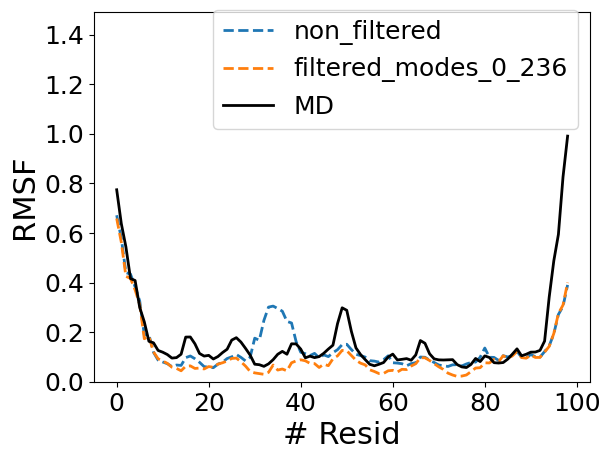

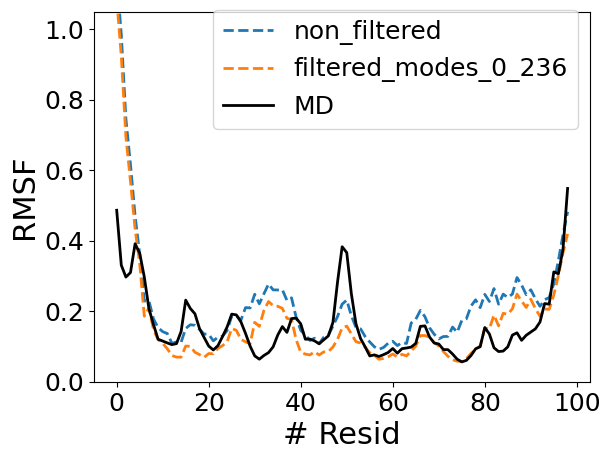

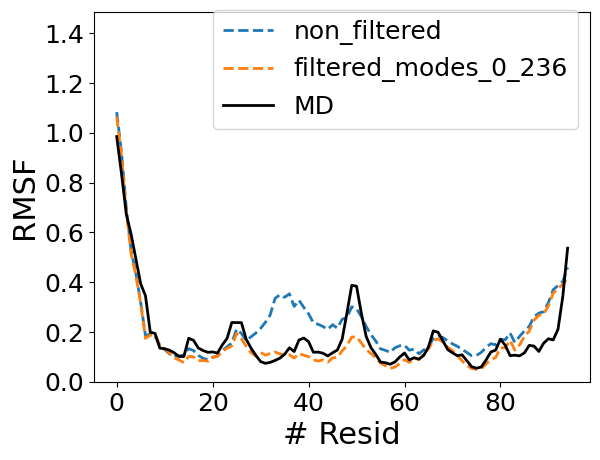

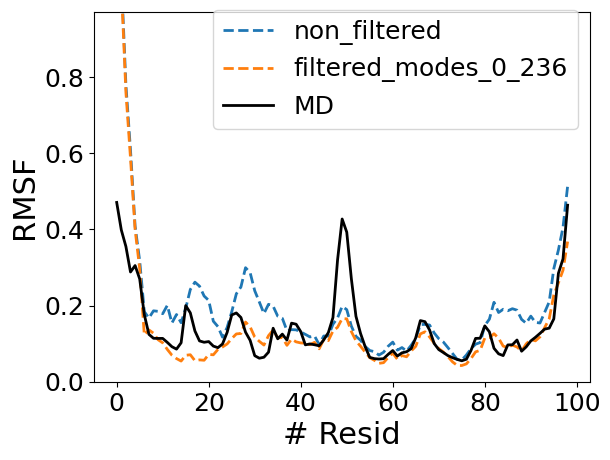

In [ ]:
for SYS in ['3ttp', '2pc0', '1q9p', '6p9a']:

  methods = list(HA_tcf_calc[SYS].keys())
  msas=[8]

  for ii,msa in enumerate(msas_calculated):

      if msa in msas:

          eigvecs = HA_tcf_calc[SYS]['AF2']['CinvH']['eigvec'][ii]

          mu_eig = HA_tcf_calc[SYS]['AF2']['C']['eigval'][ii]

          rmsf = get_rmsf_LE4PD(eigvecs,mu_eig)

          eigvecs = HA_tcf_calc_0_236[SYS]['AF2']['CinvH']['eigvec'][ii]

          mu_eig = HA_tcf_calc_0_236[SYS]['AF2']['C']['eigval'][ii]

          rmsf_filt = get_rmsf_LE4PD(eigvecs,mu_eig)

          plt.plot(rmsf,'--',linewidth=2,label=f"non_filtered")
          plt.plot(rmsf_filt,'--',linewidth=2,label=f"filtered_modes_0_236")
  #         plt.plot(np.arange(28,30),rmsf[28:30],'o',linewidth=2,label=f"msa:{msa}")



  plt.plot(RMSF[SYS]['MD']['RMSF'],'-k',linewidth=2,label=f"MD")
  plt.xticks(fontsize=18);
  plt.yticks(fontsize=18);
  plt.xlabel('# Resid',fontsize=22)
  plt.ylabel('RMSF',fontsize=22)
  plt.legend(bbox_to_anchor=(1,1.04),fontsize=18);
  plt.ylim([0,RMSF[SYS]['MD']['RMSF'].max()+0.5])
  plt.show()
  plt.close()